In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from itertools import combinations
import numpy as np
from humanfriendly import format_size, parse_size
from pathlib import Path

In [26]:
FIGURES = Path("../") / 'results/figures'
FIGURES.mkdir(exist_ok=True)
TABLES = Path("../") / 'results/tables'
TABLES.mkdir(exist_ok=True)

In [27]:
named_colors = {
    "black": "#000000",
    "orange": "#e69f00",
    "skyblue": "#56b4e9",
    "bluish green": "#009e73",
    "yellow": "#f0e442",
    "blue": "#0072b2",
    "vermilion": "#d55e00",
    "reddish purple": "#cc79a7",
}
cud_palette = list(named_colors.values())

In [28]:
sns.set_style("whitegrid")
sns.set_palette(cud_palette)

In [29]:
df = pd.read_csv("../results/estimates/estimates.tsv", sep="\t")
df["abs_relative_error"] = df["relative_error"].abs()
# replace values of inifinity with NaN
# df = df.replace([float("inf"), float("-inf")], float("nan"))
df

asm_accession                       organism    taxid    bioproject  \
0      GCF_040215695.1  [Arthrobacter] sp. ATCC 21022  1771959  PRJNA1116247   
1      GCF_040215695.1  [Arthrobacter] sp. ATCC 21022  1771959  PRJNA1116247   
2      GCF_040215695.1  [Arthrobacter] sp. ATCC 21022  1771959  PRJNA1116247   
3      GCF_040215695.1  [Arthrobacter] sp. ATCC 21022  1771959  PRJNA1116247   
4      GCF_040215695.1  [Arthrobacter] sp. ATCC 21022  1771959  PRJNA1116247   
...                ...                            ...      ...           ...   
16845  GCF_004353525.1        Zhaonella formicivorans  2528593   PRJNA523471   
16846  GCF_004353525.1        Zhaonella formicivorans  2528593   PRJNA523471   
16847  GCF_004353525.1        Zhaonella formicivorans  2528593   PRJNA523471   
16848  GCF_004353525.1        Zhaonella formicivorans  2528593   PRJNA523471   
16849  GCF_004353525.1        Zhaonella formicivorans  2528593   PRJNA523471   

          biosample      strain  asm_seq_tech  n_chromosomes  true_size  \
0      SAMN41528051  ATCC 21022  Illumina;ONT              1    4434229   
1      SAMN41528051  ATCC 21022  Illumina;ONT              1    4434229   
2      SAMN41528051  ATCC 21022  Illumina;ONT              1    4434229   
3      SAMN41528051  ATCC 21022  Illumina;ONT              1    4434229   
4      SAMN41528051  ATCC 21022  Illumina;ONT              1    4434229   
...             ...         ...           ...            ...        ...   
16845  SAMN10977731         K32           ONT              1    3314304   
16846  SAMN10977731         K32           ONT              1    3314304   
16847  SAMN10977731         K32           ONT              1    3314304   
16848  SAMN10977731         K32           ONT              1    3314304   
16849  SAMN10977731         K32           ONT              1    3314304   

       asm_coverage  ... relative_size  relative_error  cpu_time  memory_mb  \
0             100.0  ...      1.045499        4.549900     15.52       6.00   
1             100.0  ...      1.041971        4.197099     15.53       6.00   
2             100.0  ...      1.187997       18.799683     15.12     464.69   
3             100.0  ...      0.942282       -5.771759     30.12    8143.68   
4             100.0  ...      0.998984       -0.101596    708.92   15755.74   
...             ...  ...           ...             ...       ...        ...   
16845         400.0  ...      1.047384        4.738370    134.87    3217.22   
16846         400.0  ...      1.036112        3.611196     15.69      13.72   
16847         400.0  ...      2.538313      153.831272     44.80    1441.52   
16848         400.0  ...      1.051032        5.103243     46.40    8047.91   
16849         400.0  ...      0.971712       -2.828799    252.22   11392.15   

      stats_num_seqs stats_sum_len stats_avg_len stats_median_len avg_qual  \
0           347110.0  1.000001e+09        2880.9           1852.0    16.71   
1           347110.0  1.000001e+09        2880.9           1852.0    16.71   
2           347110.0  1.000001e+09        2880.9           1852.0    16.71   
3           347110.0  1.000001e+09        2880.9           1852.0    16.71   
4           347110.0  1.000001e+09        2880.9           1852.0    16.71   
...              ...           ...           ...              ...      ...   
16845       106958.0  1.000007e+09        9349.5           6503.0     9.68   
16846       106958.0  1.000007e+09        9349.5           6503.0     9.68   
16847       106958.0  1.000007e+09        9349.5           6503.0     9.68   
16848       106958.0  1.000007e+09        9349.5           6503.0     9.68   
16849       106958.0  1.000007e+09        9349.5           6503.0     9.68   

       abs_relative_error  
0                4.549900  
1                4.197099  
2               18.799683  
3                5.771759  
4                0.101596  
...                   ...  
16845            4.738370  
16846            3.611196  
16847    

In [30]:
# check there are no values of infinity
assert not df.isin([float("inf"), float("-inf")]).any().any()

In [31]:
label_mapping = {"OXFORD_NANOPORE": "ONT", "PACBIO_SMRT": "PacBio"}

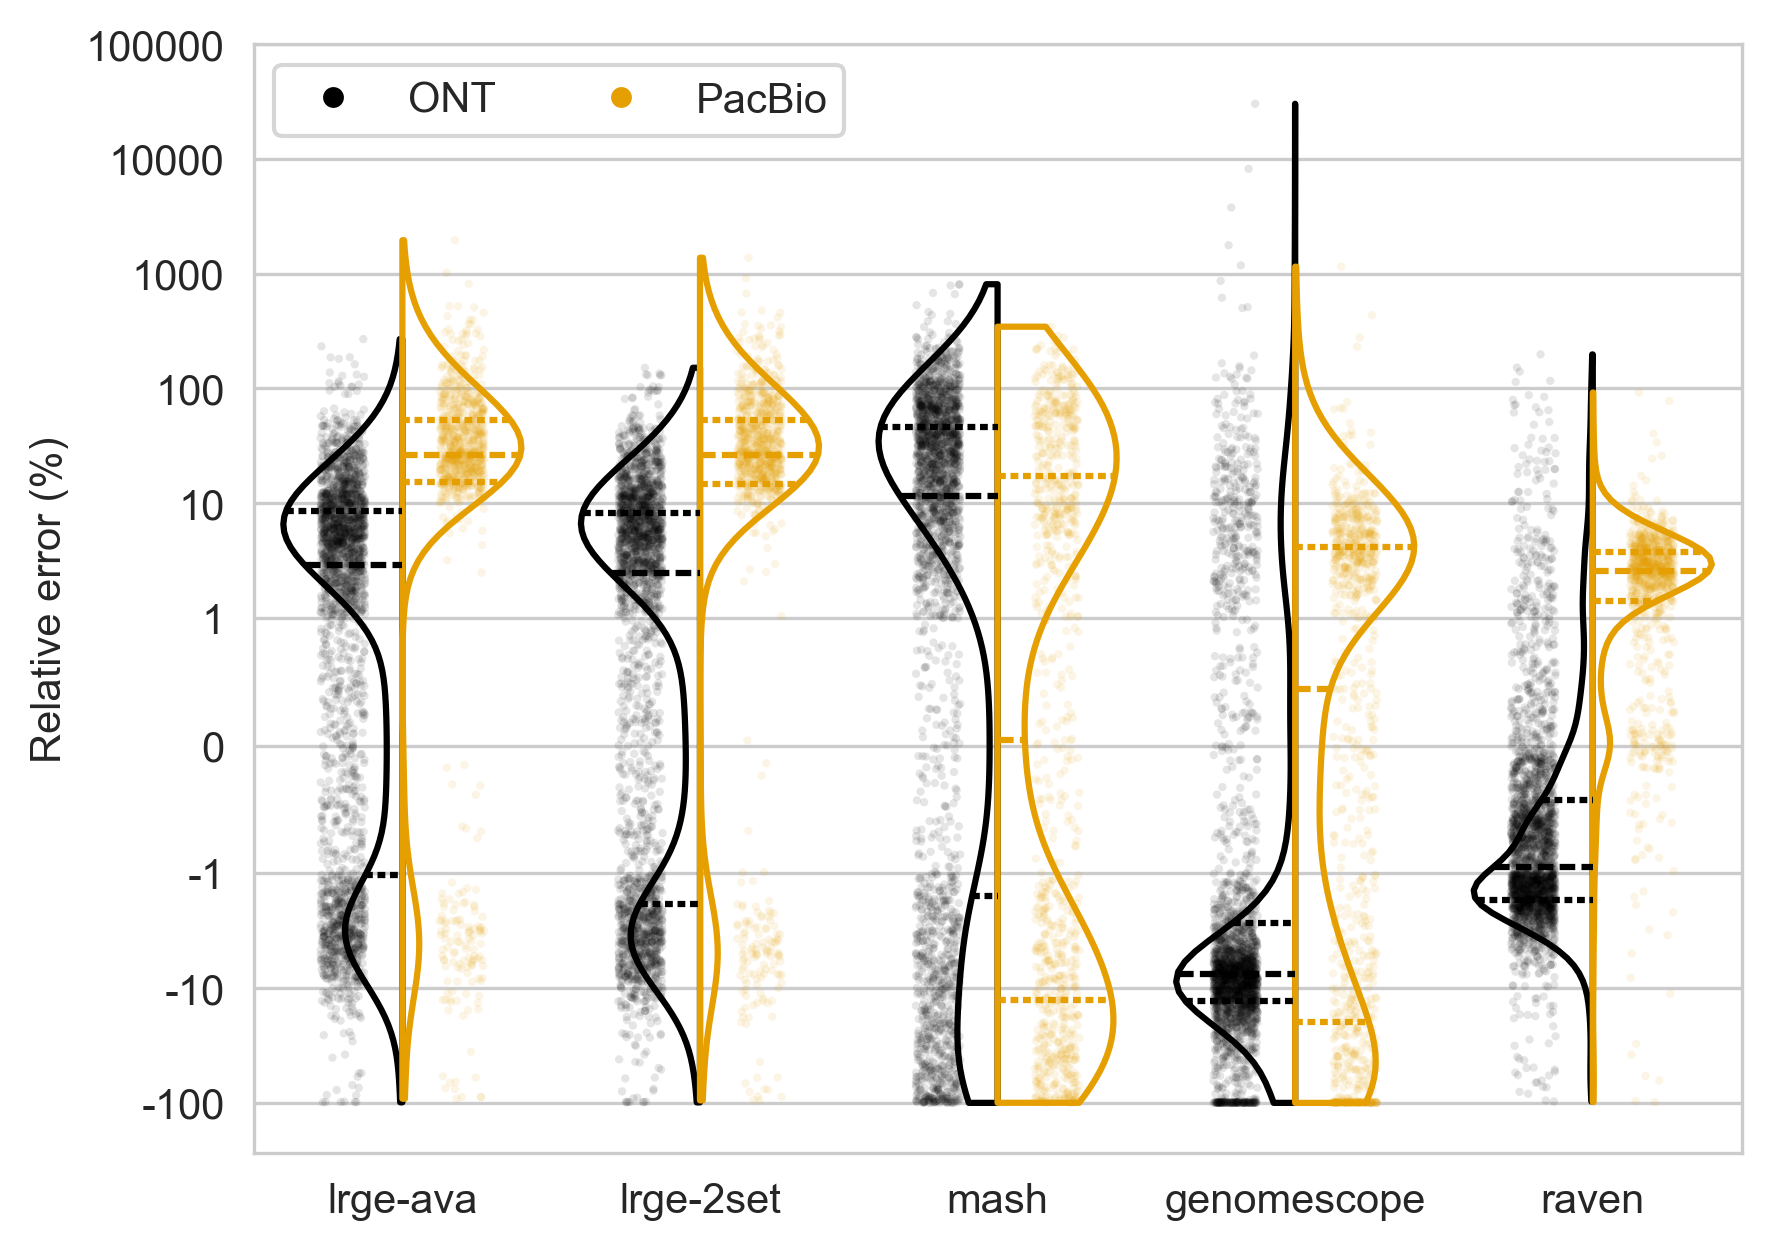

In [32]:
fig, ax = plt.subplots(dpi=300)
x = "method"
y = "relative_error"
hue = "platform"
data = df
ax.set_yscale("symlog", linthresh=1)
# sns.boxplot(x=x, y=y, hue=hue, data=data, ax=ax, fill=False, fliersize=0, gap=0.1)
sns.violinplot(
    x=x,
    y=y,
    hue=hue,
    data=data,
    ax=ax,
    fill=False,
    linewidth=1.5,
    density_norm="width",
    legend=False,
    split=True,
    cut=0,
    inner="quart"
)
sns.stripplot(x=x, y=y, hue=hue, data=data, ax=ax, dodge=True, alpha=0.1, jitter=0.15, size=2)

yticks = [-100, -10, -1, 0, 1, 10, 100, 1000, 10000, 100000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_xlabel("")
ax.set_ylabel("Relative error (%)")

# make the markers larger and less transparent in the legend
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_markersize(5)
    handle.set_alpha(1)

labels = [label_mapping.get(label, label) for label in labels]

ax.legend(
    handles,
    labels,
    loc="best",
    # bbox_to_anchor=(0.5, 0.95),
    ncol=2,
    title="",
    alignment="center",
)
fig.savefig(FIGURES / "platform_relative_error.png", bbox_inches="tight")

In [33]:
tbl = df.groupby(["method", "platform"])["relative_error"].describe()
tbl.to_csv(TABLES / "platform_relative_error.tsv", sep="\t")
tbl

count       mean         std        min  \
method      platform                                                    
genomescope OXFORD_NANOPORE  2468.0   7.644182  636.645763 -99.999656   
            PACBIO_SMRT       902.0 -13.579712   56.543959 -99.999989   
lrge-2set   OXFORD_NANOPORE  2468.0   4.638069   15.890009 -99.019803   
            PACBIO_SMRT       902.0  46.271895   83.405909 -95.101198   
lrge-ava    OXFORD_NANOPORE  2468.0   5.885256   18.193366 -98.893232   
            PACBIO_SMRT       902.0  48.905073  100.086313 -92.079340   
mash        OXFORD_NANOPORE  2468.0  26.097458   68.628448 -99.965405   
            PACBIO_SMRT       902.0   7.943503   56.503547 -99.823025   
raven       OXFORD_NANOPORE  2468.0  -0.744353   10.548993 -97.243628   
            PACBIO_SMRT       902.0   2.562147    7.625305 -98.434872   

                                   25%        50%        75%           max  
method      platform                                                        
genomescope OXFORD_NANOPORE -12.973667  -7.477973  -2.691269  30172.362713  
            PACBIO_SMRT     -19.602522   0.440729   4.136072   1150.362075  
lrge-2set   OXFORD_NANOPORE  -1.861149   2.482120   8.260336    151.469511  
            PACBIO_SMRT      14.792332  26.426550  53.089389   1376.664948  
lrge-ava    OXFORD_NANOPORE  -1.029340   2.875780   8.630629    269.222049  
            PACBIO_SMRT      15.273045  26.314639  53.320172   1955.955316  
mash        OXFORD_NANOPORE  -1.589951  11.550369  45.733952    809.126097  
            PACBIO_SMRT     -12.669609   0.042105  17.167378    345.128385  
raven       OXFORD_NANOPORE  -1.712491  -0.948821  -0.423753    197.959118  
            PACBIO_SMRT       1.402429   2.580910   3.789849     92.172195

/var/folders/bp/zbbdn_091x1_34h2k7b9nszm0000gn/T/ipykernel_19839/3207729266.py:7: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.scatterplot(x=x, y=y, hue=hue, data=data, ax=ax, alpha=0.1, palette=cud_palette)


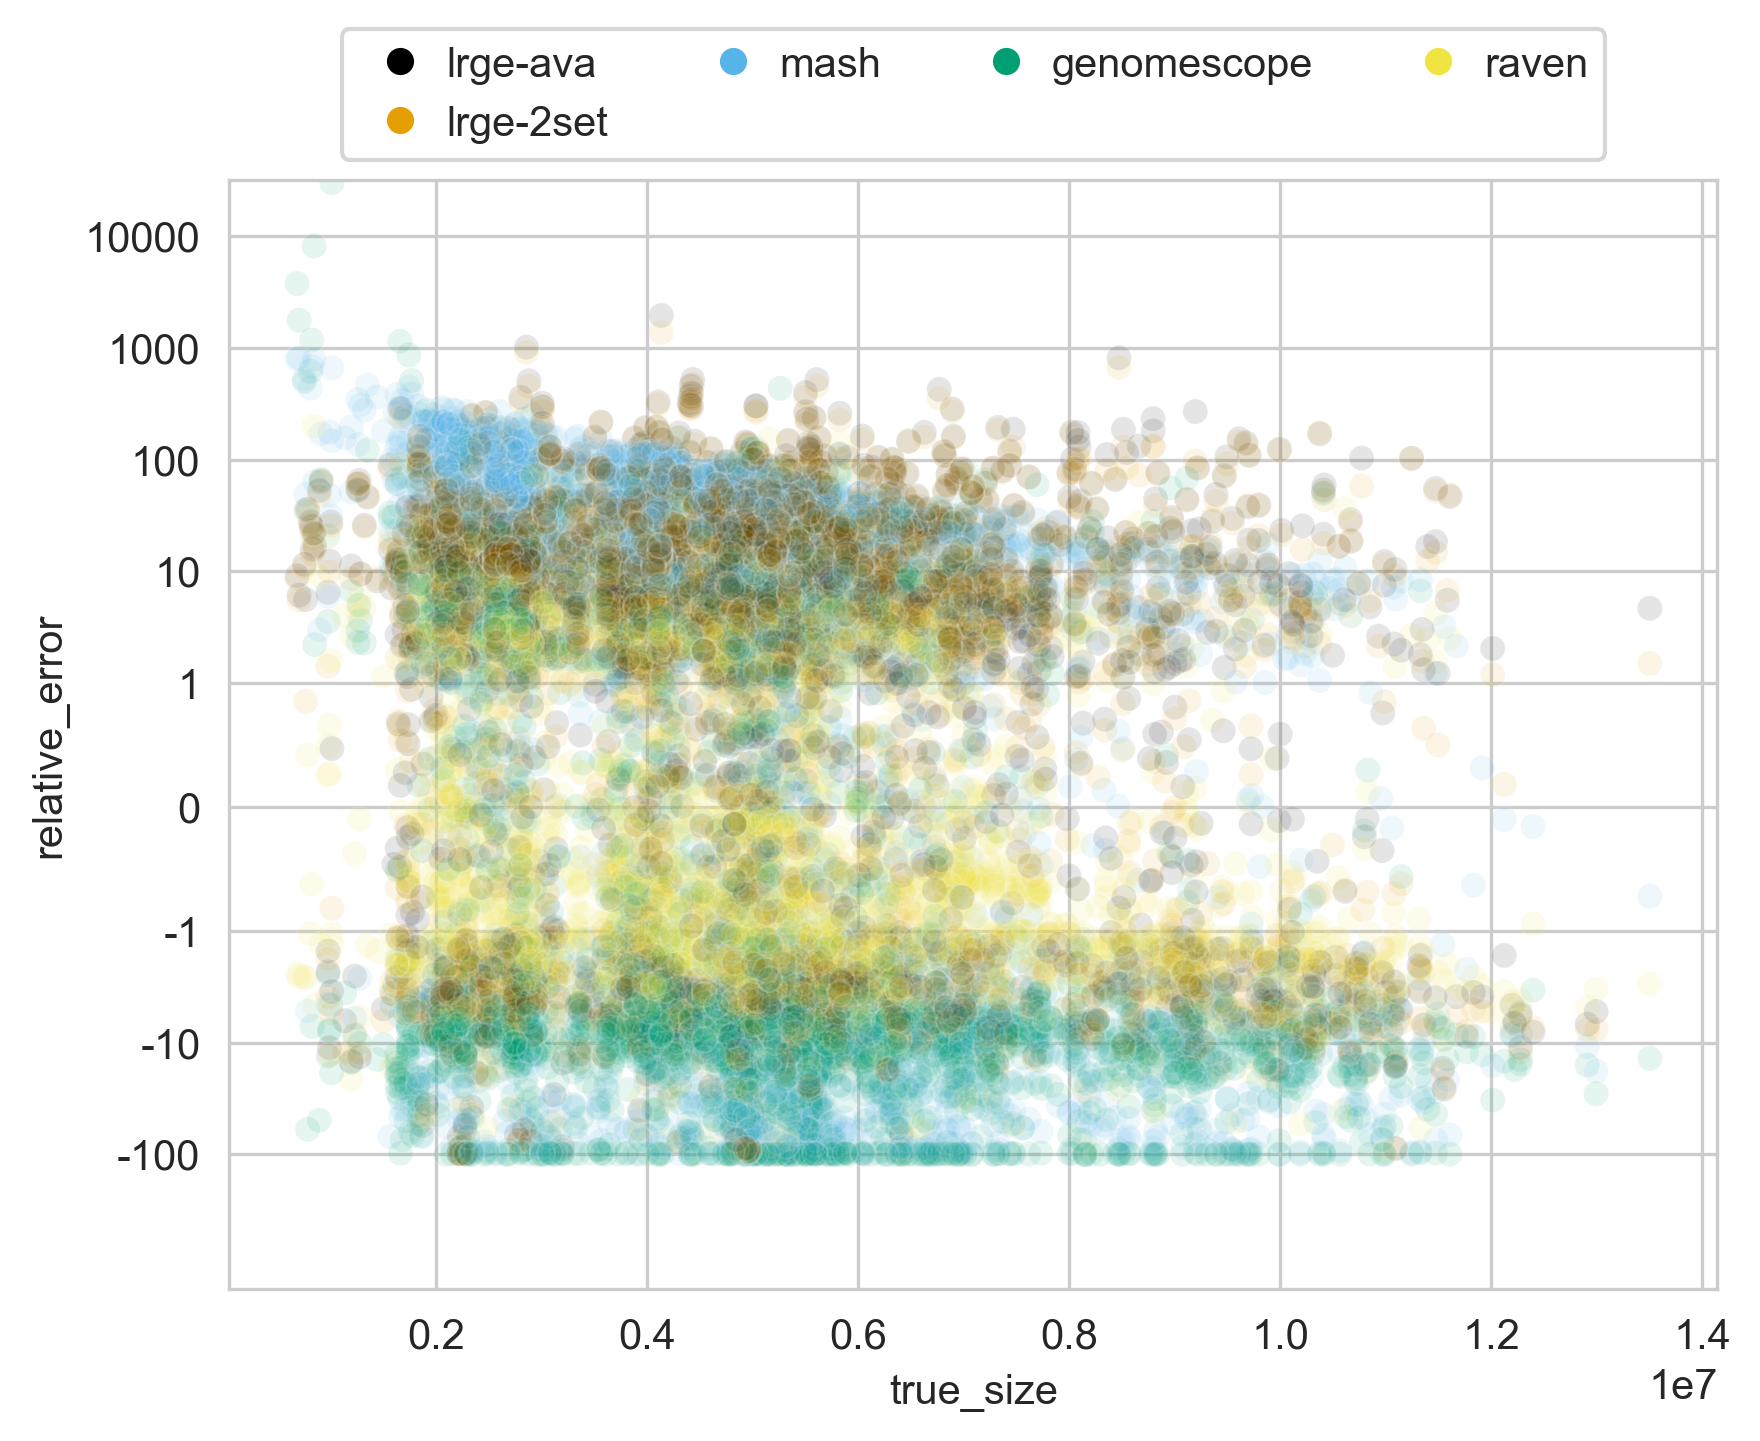

In [34]:
x = "true_size"
y = "relative_error"
style = "platform"
hue = "method"
data = df
fig, ax = plt.subplots(dpi=300)
sns.scatterplot(x=x, y=y, hue=hue, data=data, ax=ax, alpha=0.1, palette=cud_palette)
yticks = [-100, -10, -1, 0, 1, 10, 100, 1000, 10000]
ax.set_yscale("symlog", linthresh=1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

# make the markers larger and less transparent in the legend
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_markersize(7)
    handle.set_alpha(1)

ax.legend(
    handles,
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=4,
    title="",
    alignment="center",
    handletextpad=0.1,
)

In [35]:
df.groupby(["method", "platform"])["abs_relative_error"].describe()

count       mean         std       min  \
method      platform                                                   
genomescope OXFORD_NANOPORE  2468.0  36.168569  635.663110  0.000967   
            PACBIO_SMRT       902.0  24.489009   52.739505  0.004800   
lrge-2set   OXFORD_NANOPORE  2468.0   8.860149   13.981370  0.002760   
            PACBIO_SMRT       902.0  49.581574   81.479747  0.040605   
lrge-ava    OXFORD_NANOPORE  2468.0   9.164300   16.781848  0.000242   
            PACBIO_SMRT       902.0  51.886443   98.572003  0.150470   
mash        OXFORD_NANOPORE  2468.0  42.500085   59.868421  0.001658   
            PACBIO_SMRT       902.0  35.061845   45.001364  0.008119   
raven       OXFORD_NANOPORE  2468.0   2.901566   10.169220  0.000241   
            PACBIO_SMRT       902.0   3.541189    7.222411  0.000000   

                                   25%        50%        75%           max  
method      platform                                                        
genomescope OXFORD_NANOPORE   4.847736   8.458660  15.227050  30172.362713  
            PACBIO_SMRT       2.465254   5.820301  24.026782   1150.362075  
lrge-2set   OXFORD_NANOPORE   2.145430   4.801176   9.702424    151.469511  
            PACBIO_SMRT      15.525764  26.902417  55.880510   1376.664948  
lrge-ava    OXFORD_NANOPORE   1.955663   4.597893   9.644966    269.222049  
            PACBIO_SMRT      15.890730  26.811454  55.352782   1955.955316  
mash        OXFORD_NANOPORE   6.525349  24.032816  59.774773    809.126097  
            PACBIO_SMRT       4.345961  15.088962  53.573505    345.128385  
raven       OXFORD_NANOPORE   0.623426   1.120045   1.941028    197.959118  
            PACBIO_SMRT       1.493439   2.636603   3.895880     98.434872

In [36]:
# do an ANOVA to test if the means are different for the different methods on each platform

# this list will contain the results of the Tukey HSD test for those platforms where the ANOVA test is significant
# the format of each element is ((hue, x), (hue, x), pval) where the first two elements are the pairs of means that are
# significantly different and the third element is the p-value of the test
annotations = []

for platform in df["platform"].unique():
    print(f"{'=' * 30}\nPlatform: {platform}\n{'=' * 30}")
    for method in df["method"].unique():
        # print(f"Method: {method}")
        data = df[(df["platform"] == platform) & (df["method"] == method)]["abs_relative_error"]
        # print(data.describe())
    f, p = f_oneway(
        *[df[(df["platform"] == platform) & (df["method"] == method)]["abs_relative_error"] for method in df["method"].unique()]
    )
    print(f"ANOVA: f={f}, p={p}")
    if p < 0.05:
        print("Means are significantly different")
        tukey = pairwise_tukeyhsd(
            df[(df["platform"] == platform)]["abs_relative_error"], df[(df["platform"] == platform)]["method"]
        )
        print(tukey.summary())
        for i, tup in enumerate(combinations(tukey.groupsunique, 2)):
            if not tukey.reject[i]:
                continue
            pval = float(tukey.pvalues[i])
            annotations.append(((tup[0], platform), (tup[1], platform), pval))
    else:
        print("Means are not significantly different")

Platform: OXFORD_NANOPORE
ANOVA: f=9.835463729889526, p=6.090648770346578e-08
Means are significantly different
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1     group2  meandiff p-adj   lower    upper   reject
--------------------------------------------------------------
genomescope lrge-2set -27.3084 0.0071 -49.4998  -5.1171   True
genomescope  lrge-ava -27.0043  0.008 -49.1956  -4.8129   True
genomescope      mash   6.3315 0.9369 -15.8598  28.5229  False
genomescope     raven  -33.267 0.0004 -55.4584 -11.0756   True
  lrge-2set  lrge-ava   0.3042    1.0 -21.8872  22.4955  False
  lrge-2set      mash  33.6399 0.0003  11.4486  55.8313   True
  lrge-2set     raven  -5.9586  0.949 -28.1499  16.2328  False
   lrge-ava      mash  33.3358 0.0004  11.1444  55.5271   True
   lrge-ava     raven  -6.2627 0.9393 -28.4541  15.9286  False
       mash     raven -39.5985    0.0 -61.7899 -17.4072   True
--------------------------------------------------------------
Platfo

In [37]:
def pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    else:
        return "ns"

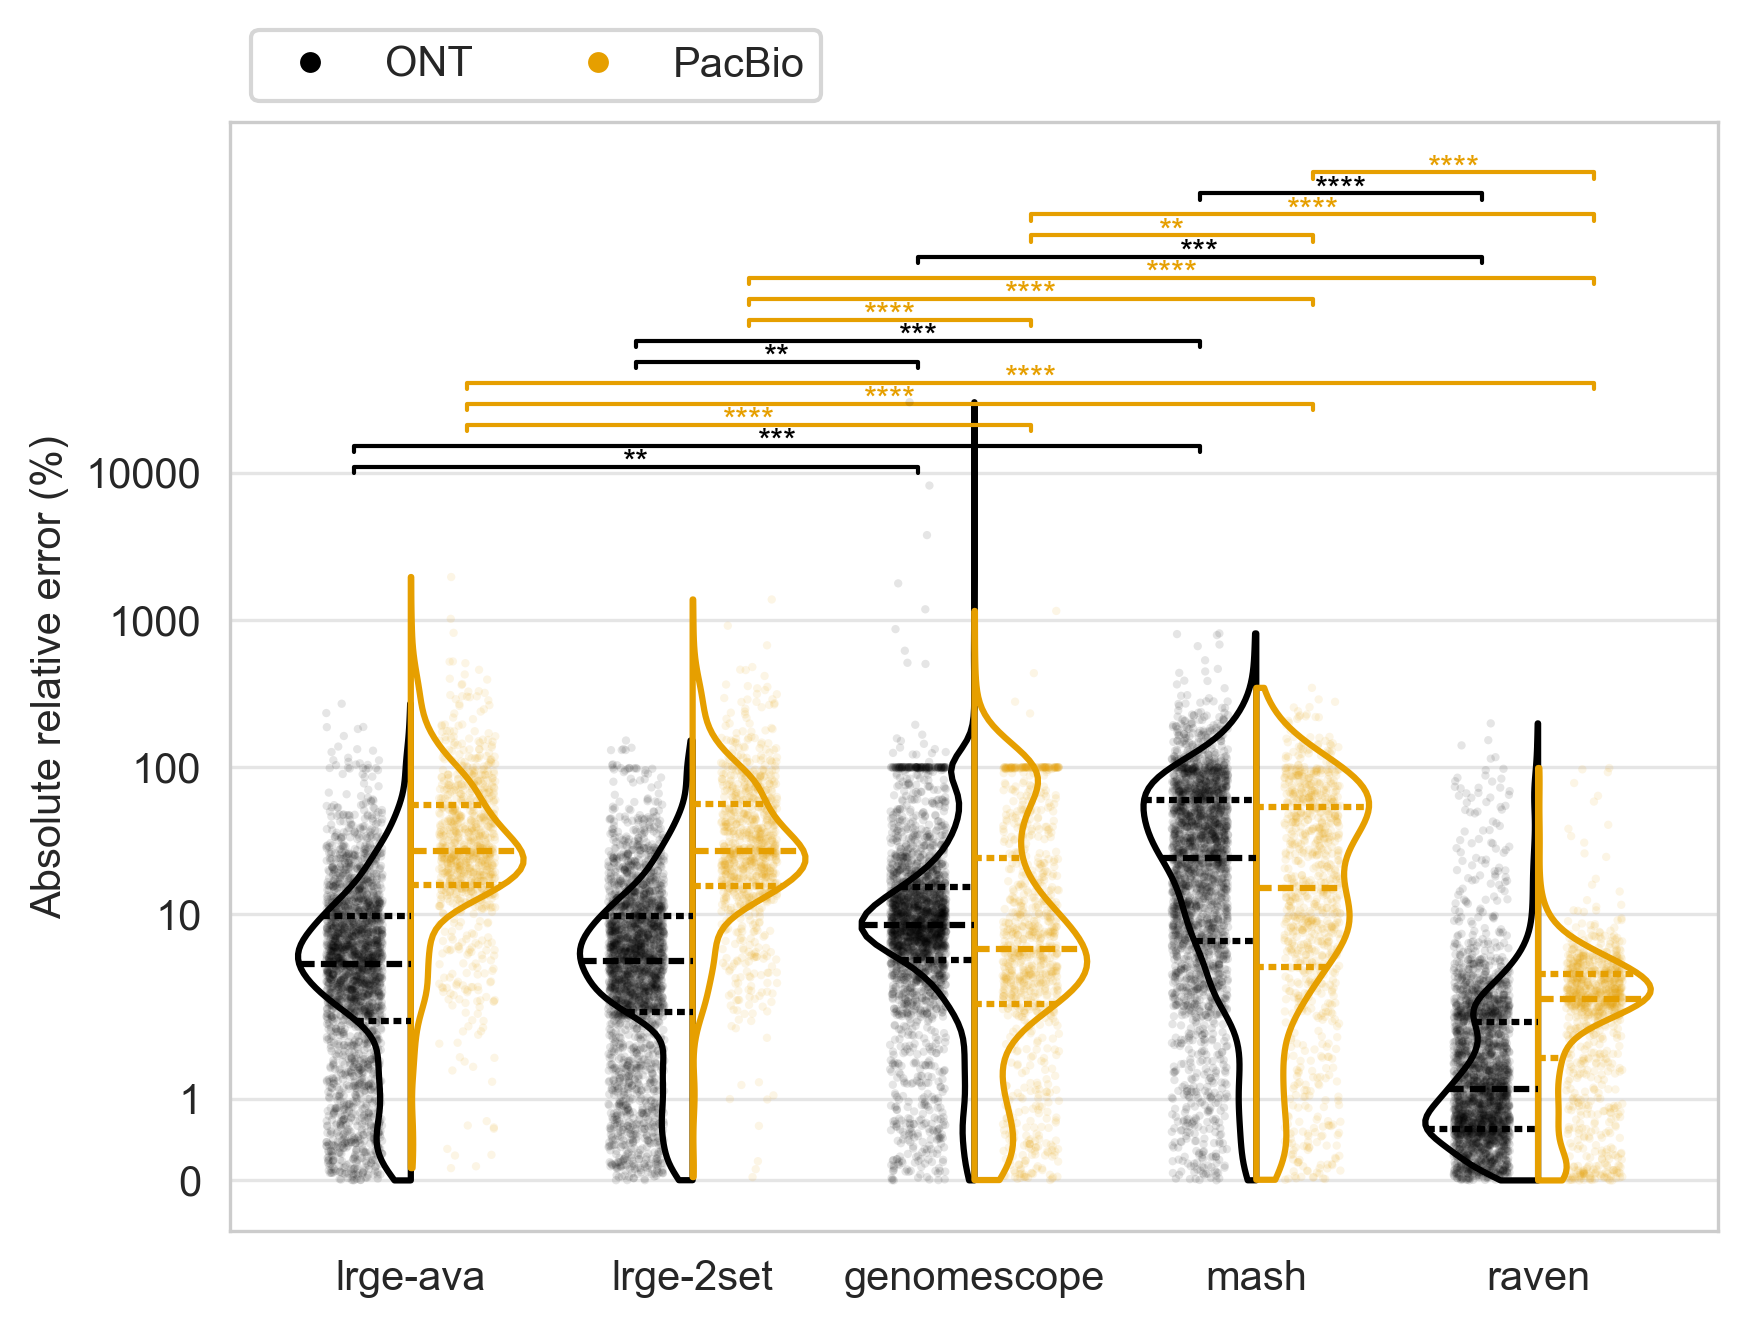

In [ ]:
fig, ax = plt.subplots(dpi=300)
x = "method"
y = "abs_relative_error"
hue = "platform"
data = df

order = ["lrge-ava", "lrge-2set", "genomescope", "mash", "raven"]
hue_order = sorted(data[hue].unique())
ax.set_yscale("symlog")
sns.stripplot(
    x=x,
    y=y,
    hue=hue,
    data=data,
    ax=ax,
    dodge=True,
    alpha=0.1,
    jitter=0.2,
    order=order,
    hue_order=hue_order,
    size=2,
)

sns.violinplot(
    x=x,
    y=y,
    hue=hue,
    data=data,
    ax=ax,
    fill=False,
    linewidth=1.5,
    density_norm="width",
    legend=False,
    order=order,
    hue_order=hue_order,
    inner="quart",
    cut=0,
    split=True,
)


yticks = [0, 1, 10, 100, 1000, 10000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

# statistical annotations
args = []
for i, ((m1, platform), (m2, _), pval) in enumerate(annotations):
    m1_x = order.index(m1)
    m2_x = order.index(m2)
    platform_ix = hue_order.index(platform)
    offset = -0.2 if platform_ix == 0 else 0.2
    x1, x2 = sorted([m1_x + offset, m2_x + offset])

    col_ix = hue_order.index(platform)
    col = cud_palette[col_ix]
    annot = pvalue_to_asterisks(pval)

    args.append((x1, x2, col, annot))

annot_ys = np.logspace(4, 6, num=len(annotations), base=10)
for i, (x1, x2, col, annot) in enumerate(sorted(args)):
    bracket_y = annot_ys[i]
    h = 0.1 * bracket_y
    ax.plot(
        [x1, x1, x2, x2],
        [bracket_y, bracket_y + h, bracket_y + h, bracket_y],
        lw=1,
        c=col,
        # alpha=0.5
    )
    ax.text((x1 + x2) * 0.5, bracket_y*0.9, annot, ha="center", va="bottom", color=col, fontsize=8)


# make the markers larger and less transparent in the legend
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_markersize(5)
    handle.set_alpha(1)

labels = [label_mapping.get(label, label) for label in labels]

ax.legend(
    handles,
    labels,
    loc="lower left",
    bbox_to_anchor=(0, 1),
    ncol=2,
    title="",
    alignment="center",
)
ax.set_ylabel("Absolute relative error (%)")
ax.set_xlabel("")
# turn on y-axis grid
ax.yaxis.grid(True)
# increase the transparency of the grid
ax.yaxis.grid(alpha=0.5)
fig.savefig(FIGURES / "method_absolute_relative_error.png", bbox_inches="tight")

In [39]:
tbl = df.groupby(["method", "platform"])["abs_relative_error"].describe()
tbl.to_csv(TABLES / "method_absolute_relative_error.tsv", sep="\t")
tbl

count       mean         std       min  \
method      platform                                                   
genomescope OXFORD_NANOPORE  2468.0  36.168569  635.663110  0.000967   
            PACBIO_SMRT       902.0  24.489009   52.739505  0.004800   
lrge-2set   OXFORD_NANOPORE  2468.0   8.860149   13.981370  0.002760   
            PACBIO_SMRT       902.0  49.581574   81.479747  0.040605   
lrge-ava    OXFORD_NANOPORE  2468.0   9.164300   16.781848  0.000242   
            PACBIO_SMRT       902.0  51.886443   98.572003  0.150470   
mash        OXFORD_NANOPORE  2468.0  42.500085   59.868421  0.001658   
            PACBIO_SMRT       902.0  35.061845   45.001364  0.008119   
raven       OXFORD_NANOPORE  2468.0   2.901566   10.169220  0.000241   
            PACBIO_SMRT       902.0   3.541189    7.222411  0.000000   

                                   25%        50%        75%           max  
method      platform                                                        
genomescope OXFORD_NANOPORE   4.847736   8.458660  15.227050  30172.362713  
            PACBIO_SMRT       2.465254   5.820301  24.026782   1150.362075  
lrge-2set   OXFORD_NANOPORE   2.145430   4.801176   9.702424    151.469511  
            PACBIO_SMRT      15.525764  26.902417  55.880510   1376.664948  
lrge-ava    OXFORD_NANOPORE   1.955663   4.597893   9.644966    269.222049  
            PACBIO_SMRT      15.890730  26.811454  55.352782   1955.955316  
mash        OXFORD_NANOPORE   6.525349  24.032816  59.774773    809.126097  
            PACBIO_SMRT       4.345961  15.088962  53.573505    345.128385  
raven       OXFORD_NANOPORE   0.623426   1.120045   1.941028    197.959118  
            PACBIO_SMRT       1.493439   2.636603   3.895880     98.434872

Plot the run time and memory usage

In [40]:
import re

def parse_time(time_str):
    # Define unit multipliers in seconds
    unit_multipliers = {'d': 86400, 'h': 3600, 'm': 60, 's': 1}
    total_seconds = 0

    # Find all matches of the format (number)(unit), e.g., 2m, 1h, 30s
    matches = re.findall(r"(\d+)([dhms])", time_str)
    
    for value, unit in matches:
        # Convert value to int and multiply by the appropriate unit multiplier
        total_seconds += int(value) * unit_multipliers[unit]
    
    return total_seconds

# Examples
print(parse_time("2m"))         # Output: 120
print(parse_time("1m 40s"))     # Output: 100
print(parse_time("1h 1m 1s"))   # Output: 3661
print(parse_time("1d 2h"))      # Output: 93600

def format_time(seconds):
    # Define the time units
    units = [("d", 86400), ("h", 3600), ("m", 60), ("s", 1)]
    parts = []

    # Loop through each time unit
    for unit, divisor in units:
        value, seconds = divmod(seconds, divisor)  # Get unit value and remainder
        if value > 0:
            parts.append(f"{value}{unit}")  # Only add non-zero units

    return " ".join(parts) if parts else "0s"  # Return formatted string

# Examples
print(format_time(120))   # Output: "2m"
print(format_time(100))   # Output: "1m 40s"
print(format_time(3661))  # Output: "1h 1m 1s"


120
100
3661
93600
2m
1m 40s
1h 1m 1s


In [41]:
# normalise the runtime by the number of bases in the input file
df["s/Mbp"] = df["cpu_time"] / (df["stats_sum_len"] / 1e6)

In [42]:
df.groupby(["method", "platform"])["s/Mbp"].describe()

count      mean       std       min       25%  \
method      platform                                                          
genomescope OXFORD_NANOPORE  2468.0  0.056902  0.020673  0.015720  0.040548   
            PACBIO_SMRT       902.0  0.048772  0.015824  0.014810  0.038607   
lrge-2set   OXFORD_NANOPORE  2468.0  0.089203  0.199858  0.010240  0.017496   
            PACBIO_SMRT       902.0  0.066454  0.191189  0.006940  0.015520   
lrge-ava    OXFORD_NANOPORE  2468.0  0.377356  0.644083  0.010840  0.074905   
            PACBIO_SMRT       902.0  0.321963  1.016991  0.009760  0.022640   
mash        OXFORD_NANOPORE  2468.0  0.061074  0.054760  0.014790  0.028632   
            PACBIO_SMRT       902.0  0.148809  0.111551  0.014960  0.074909   
raven       OXFORD_NANOPORE  2468.0  0.284097  0.153603  0.052791  0.182902   
            PACBIO_SMRT       902.0  0.245067  0.252161  0.049228  0.139412   

                                  50%       75%        max  
method      platform                                        
genomescope OXFORD_NANOPORE  0.056680  0.070487   0.179464  
            PACBIO_SMRT      0.046995  0.055300   0.164961  
lrge-2set   OXFORD_NANOPORE  0.036476  0.077118   3.640463  
            PACBIO_SMRT      0.018500  0.024329   2.701643  
lrge-ava    OXFORD_NANOPORE  0.185118  0.387200   8.826696  
            PACBIO_SMRT      0.064369  0.132591  17.269834  
mash        OXFORD_NANOPORE  0.045060  0.074772   0.729827  
            PACBIO_SMRT      0.115478  0.194506   0.912098  
raven       OXFORD_NANOPORE  0.251896  0.350797   1.164850  
            PACBIO_SMRT      0.189684  0.214699   2.220394

In [43]:
# statistical tests for CPU time across methods - not grouped by platform though
cpu_annotations = []
cpu_metric = "cpu_time"
is_significant = False
for method in df["method"].unique():
    data = df[df["method"] == method][cpu_metric]
    f, p = f_oneway(*[df[df["method"] == method][cpu_metric] for method in df["method"].unique()])
    print(f"Method: {method}, ANOVA: f={f}, p={p}")
    is_significant = p < 0.05
if is_significant:
    print("Means are significantly different")
    tukey = pairwise_tukeyhsd(
        df[cpu_metric], df["method"]
    )
    print(tukey.summary())
    for i, tup in enumerate(combinations(tukey.groupsunique, 2)):
        if not tukey.reject[i]:
            continue
        mean_diff = tukey.meandiffs[i]
        lowest = tup[0] if mean_diff > 0 else tup[1]
        pval = float(tukey.pvalues[i])
        cpu_annotations.append((tup[0], tup[1], pval, lowest))
else:
    print("Means are not significantly different")

Method: lrge-ava, ANOVA: f=472.39009991905084, p=0.0
Method: lrge-2set, ANOVA: f=472.39009991905084, p=0.0
Method: mash, ANOVA: f=472.39009991905084, p=0.0
Method: genomescope, ANOVA: f=472.39009991905084, p=0.0
Method: raven, ANOVA: f=472.39009991905084, p=0.0
Means are significantly different
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1     group2   meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------
genomescope lrge-2set    6.3565 0.7994   -9.2131   21.9261  False
genomescope  lrge-ava  162.8311    0.0  147.2614  178.4007   True
genomescope      mash   21.5754 0.0015    6.0058    37.145   True
genomescope     raven  174.4343    0.0  158.8647  190.0039   True
  lrge-2set  lrge-ava  156.4745    0.0  140.9049  172.0441   True
  lrge-2set      mash   15.2188 0.0591   -0.3508   30.7884  False
  lrge-2set     raven  168.0778    0.0  152.5081  183.6474   True
   lrge-ava      mash -141.2557    0.0 -156.

In [44]:
# statistical tests for memory usage across methods - not grouped by platform though
mem_annotations = []
is_significant = False
for method in df["method"].unique():
    data = df[df["method"] == method]["memory_mb"]
    f, p = f_oneway(*[df[df["method"] == method]["memory_mb"] for method in df["method"].unique()])
    print(f"Method: {method}, ANOVA: f={f}, p={p}")
    is_significant = p < 0.05
if is_significant:
    print("Means are significantly different")
    tukey = pairwise_tukeyhsd(
        df["memory_mb"], df["method"]
    )
    print(tukey.summary())
    for i, tup in enumerate(combinations(tukey.groupsunique, 2)):
        if not tukey.reject[i]:
            continue
        mean_diff = tukey.meandiffs[i]
        lowest = tup[0] if mean_diff > 0 else tup[1]
        pval = float(tukey.pvalues[i])
        mem_annotations.append((tup[0], tup[1], pval, lowest))
else:
    print("Means are not significantly different")

Method: lrge-ava, ANOVA: f=3337.8185861797792, p=0.0
Method: lrge-2set, ANOVA: f=3337.8185861797792, p=0.0
Method: mash, ANOVA: f=3337.8185861797792, p=0.0
Method: genomescope, ANOVA: f=3337.8185861797792, p=0.0
Method: raven, ANOVA: f=3337.8185861797792, p=0.0
Means are significantly different
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1     group2   meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------
genomescope lrge-2set -4443.1577    0.0  -4618.864 -4267.4513   True
genomescope  lrge-ava -3064.2047    0.0  -3239.911 -2888.4983   True
genomescope      mash -3106.0157    0.0 -3281.7221 -2930.3094   True
genomescope     raven  1966.5525    0.0  1790.8462  2142.2589   True
  lrge-2set  lrge-ava   1378.953    0.0  1203.2467  1554.6594   True
  lrge-2set      mash  1337.1419    0.0  1161.4356  1512.8483   True
  lrge-2set     raven  6409.7102    0.0  6234.0039  6585.4166   True
   lrge-ava   

In [45]:
df["memory_bytes"] = df["memory_mb"].apply(lambda x: x * 1024 * 1024)

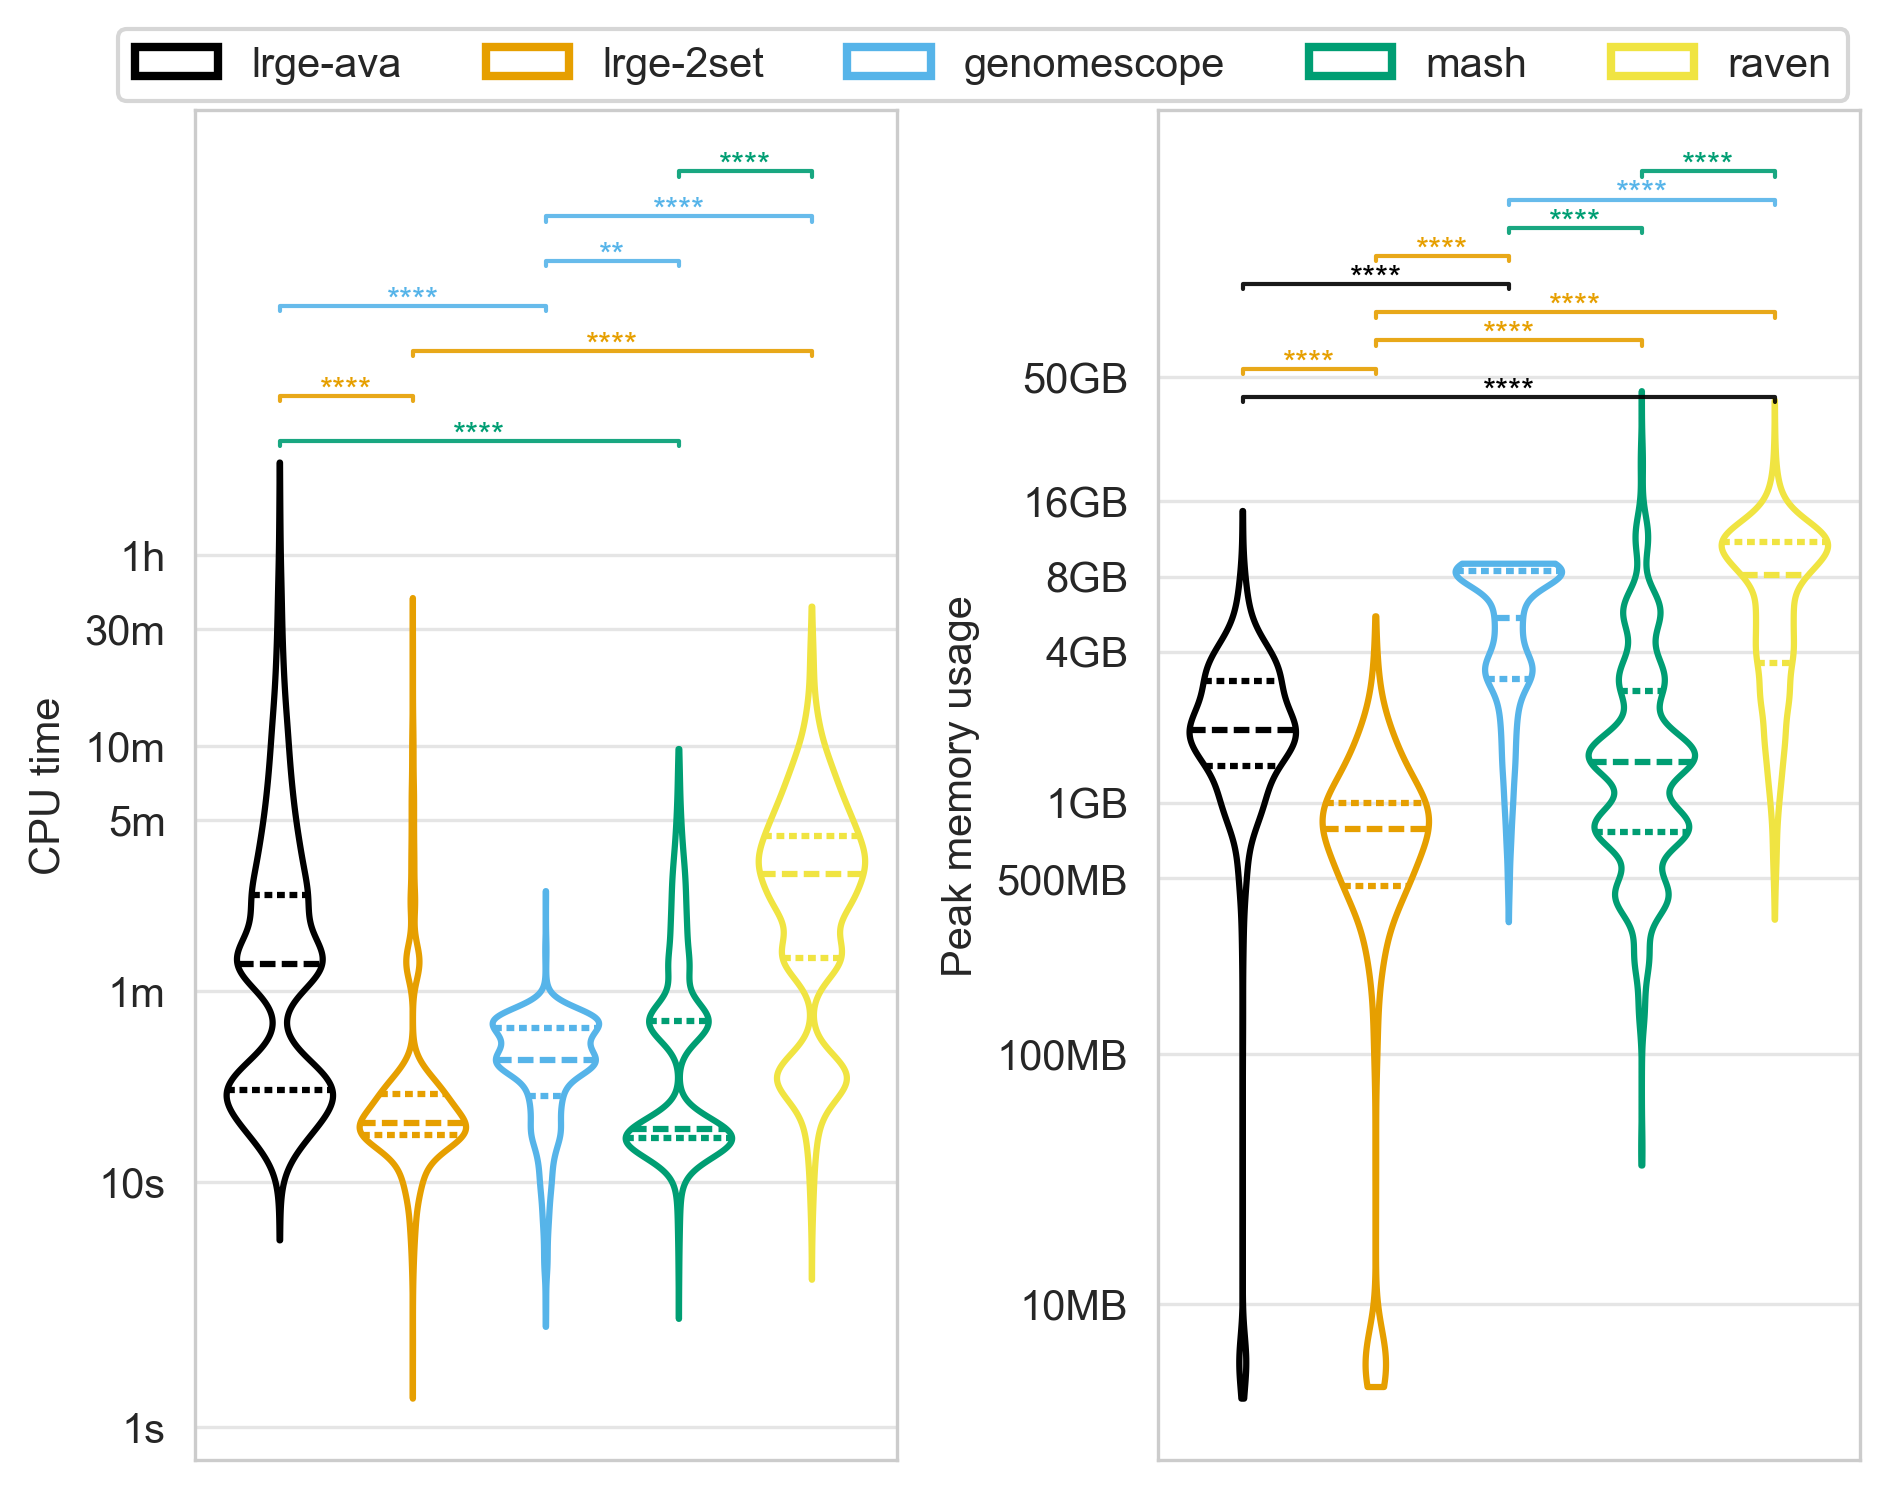

In [46]:
fig, axes = plt.subplots(dpi=300, ncols=2)
lw = 1.5
x = "method"
hue = x
y = cpu_metric

cpu_ax = axes[0]
mem_ax = axes[1]

# sns.boxenplot(x=x, y=y, data=df, ax=cpu_ax, hue=y, fill=False, lw=lw, showfliers=False)
# sns.stripplot(x=x, y=y, data=df, ax=cpu_ax, hue=hue, alpha=0.1, jitter=0.1)
sns.violinplot(
    x=x,
    y=y,
    data=df,
    ax=cpu_ax,
    hue=hue,
    fill=False,
    density_norm="width",
    cut=0,
    log_scale=True,
    gridsize=1000,
    inner="quart",
    linewidth=lw,
    legend=True,
    hue_order=order,
    order=order,
)

y = "memory_bytes"
# sns.boxenplot(x=x, y=y, data=df, ax=mem_ax, hue=y, fill=False, lw=lw, showfliers=False)
sns.violinplot(
    x=x,
    y=y,
    data=df,
    ax=mem_ax,
    hue=hue,
    fill=False,
    density_norm="width",
    cut=0,
    log_scale=True,
    gridsize=1000,
    inner="quart",
    linewidth=lw,
    hue_order=order,
    order=order,
)
# sns.stripplot(x=x, y=y, data=df, ax=mem_ax, hue=y, alpha=0.1, jitter=0.05)

# cpu_ax.set_xscale("log")
if cpu_metric != "s/Mbp":
    cpu_xticklabels = ["1s", "10s", "1m", "5m", "10m", "30m", "1h"]
    cpu_xticks = [parse_time(label) for label in cpu_xticklabels]
    logspace_min = 4
    logspace_max = 5.1
else:
    cpu_xticklabels = ["0.1", "1", "10", "100", "1000"]
    cpu_xticks = [float(label) for label in cpu_xticklabels]
    logspace_min = 1
    logspace_max = 2.1
cpu_ax.set_yticks(cpu_xticks)
cpu_ax.set_yticklabels(cpu_xticklabels)
ylabel = "sec/Mbp" if cpu_metric == "s/Mbp" else "CPU time"
cpu_ax.set_ylabel(ylabel)
cpu_ax.set_xlabel("")
# rotate the x-axis labels
cpu_ax.set_xticklabels([])
# turn on y-axis grid
cpu_ax.yaxis.grid(True)
# increase the transparency of the grid
cpu_ax.yaxis.grid(alpha=0.5)

# add stats annotations
args = []
for i, (m1, m2, pval, lowest) in enumerate(cpu_annotations):
    x1 = order.index(m1)
    x2 = order.index(m2)
    col_ix = order.index(lowest)
    col = cud_palette[col_ix]
    annot = pvalue_to_asterisks(pval)
    args.append((x1, x2, col, annot))

annot_ys = np.logspace(logspace_min, logspace_max, num=len(cpu_annotations), base=10)
for i, (x1, x2, col, annot) in enumerate(sorted(args)):
    bracket_y = annot_ys[i]
    h = 0.05 * bracket_y
    cpu_ax.plot(
        [x1, x1, x2, x2],
        [bracket_y, bracket_y + h, bracket_y + h, bracket_y],
        lw=1,
        c=col,
        alpha=0.9,
    )
    cpu_ax.text(
        (x1 + x2) * 0.5,
        bracket_y * 0.95,
        annot,
        ha="center",
        va="bottom",
        color=col,
        fontsize=8,
    )


# mem_ax.set_xscale("log")
mem_xticklabels = ["10MB", "100MB", "500MB", "1GB", "4GB", "8GB", "16GB", "50GB"]
mem_xticks = [parse_size(label) for label in mem_xticklabels]
mem_ax.set_yticks(mem_xticks)
mem_ax.set_yticklabels(mem_xticklabels)
mem_ax.set_ylabel("Peak memory usage")
mem_ax.set_xlabel("")
# rotate the x-axis labels
mem_ax.set_xticklabels([])
# turn on y-axis grid
mem_ax.yaxis.grid(True)
# increase the transparency of the grid
mem_ax.yaxis.grid(alpha=0.5)

# add stats annotations
args = []
for i, (m1, m2, pval, lowest) in enumerate(mem_annotations):
    x1 = order.index(m1)
    x2 = order.index(m2)
    col_ix = order.index(lowest)
    col = cud_palette[col_ix]
    annot = pvalue_to_asterisks(pval)
    args.append((x1, x2, col, annot))

annot_ys = np.logspace(10.6, 11.5, num=len(mem_annotations), base=10)
for i, (x1, x2, col, annot) in enumerate(sorted(args)):
    bracket_y = annot_ys[i]
    h = 0.05 * bracket_y
    mem_ax.plot(
        [x1, x1, x2, x2],
        [bracket_y, bracket_y + h, bracket_y + h, bracket_y],
        lw=1,
        c=col,
        alpha=0.9,
    )
    mem_ax.text(
        (x1 + x2) * 0.5,
        bracket_y * 0.95,
        annot,
        ha="center",
        va="bottom",
        color=col,
        fontsize=8,
    )

# make a figure level legend
handles, labels = cpu_ax.get_legend_handles_labels()
# make the lines in the legend larger
for handle in handles:
    handle.set_linewidth(2)
fig.legend(
    handles,
    labels,
    loc="center",
    bbox_to_anchor=(0.52, 1),
    ncol=len(order),
    title="",
    alignment="center",
)

cpu_ax.legend().remove()

fig.tight_layout()
fig.savefig(FIGURES / "method_cpu_memory.png", bbox_inches="tight")

In [47]:
tbl = df.groupby(["method", "platform"])[["cpu_time", "memory_mb"]].describe()
tbl.to_csv(TABLES / "method_cpu_memory.tsv", sep="\t")
tbl

cpu_time                                          \
                               count        mean         std   min       25%   
method      platform                                                           
genomescope OXFORD_NANOPORE   2468.0   29.330101   12.369493  2.66   19.7100   
            PACBIO_SMRT        902.0   38.870554   13.630113  2.57   31.4400   
lrge-2set   OXFORD_NANOPORE   2468.0   37.868160   93.881149  2.04   15.5600   
            PACBIO_SMRT        902.0   39.258149  105.644150  1.31   14.3925   
lrge-ava    OXFORD_NANOPORE   2468.0  193.076098  376.972926  5.93   26.0975   
            PACBIO_SMRT        902.0  199.198193  655.135304  5.79   22.2875   
mash        OXFORD_NANOPORE   2468.0   27.803100   19.125608  2.77   15.1200   
            PACBIO_SMRT        902.0  123.657306   96.867024  2.77   74.2100   
raven       OXFORD_NANOPORE   2468.0  203.376045  181.198006  5.71   29.0500   
            PACBIO_SMRT        902.0  214.367428  254.352104  4.00  132.2325   

                                                        memory_mb  \
                                 50%       75%      max     count   
method      platform                                                
genomescope OXFORD_NANOPORE   30.055   38.7150   144.78    2468.0   
            PACBIO_SMRT       41.105   47.3100   153.64     902.0   
lrge-2set   OXFORD_NANOPORE   17.695   23.4050  2406.64    2468.0   
            PACBIO_SMRT       16.430   22.2000  1471.96     902.0   
lrge-ava    OXFORD_NANOPORE   81.915  197.3300  7334.58    2468.0   
            PACBIO_SMRT       25.330   82.7175  8588.85     902.0   
mash        OXFORD_NANOPORE   15.220   45.0000   165.18    2468.0   
            PACBIO_SMRT      104.815  164.5875   583.26     902.0   
raven       OXFORD_NANOPORE  143.305  311.6825  1127.93    2468.0   
            PACBIO_SMRT      183.815  196.5175  2220.41     902.0   

                                                                          \
                                    mean          std     min        25%   
method      platform                                                       
genomescope OXFORD_NANOPORE  4682.539899  2611.488628  381.59  2592.1350   
            PACBIO_SMRT      6687.397517  2227.649349  318.93  5700.7050   
lrge-2set   OXFORD_NANOPORE   739.528635   580.043430    4.45   423.3075   
            PACBIO_SMRT       875.768293   486.622494    5.00   582.2225   
lrge-ava    OXFORD_NANOPORE  2056.631540  1395.790568    4.00  1186.7975   
            PACBIO_SMRT      2423.951962  1170.906976    5.00  1696.2875   
mash        OXFORD_NANOPORE  1137.112245   740.758751  124.23   716.5850   
            PACBIO_SMRT      4783.675144  4162.055581   34.08  2687.9950   
raven       OXFORD_NANOPORE  6504.717358  4428.217559  326.27  2714.6900   
            PACBIO_SMRT      9048.980798  3018.348788  414.80  7980.9675   

                                                              
                                   50%         75%       max  
method      platform                                          
genomescope OXFORD_NANOPORE   3979.410   7920.0100   8601.20  
            PACBIO_SMRT       7999.505   8119.4800   8529.62  
lrge-2set   OXFORD_NANOPORE    678.205    892.8500   5303.46  
            PACBIO_SMRT        902.925   1113.2350   2893.30  
lrge-ava    OXFORD_NANOPORE   1763.140   2603.4400  13962.38  
            PACBIO_SMRT       2230.505   3257.5450   7321.01  
mash        OXFORD_NANOPORE    801.080   1463.7350   5551.52  
            PACBIO_SMRT       3659.435   5745.0900  42001.57  
raven       OXFORD_NANOPORE   5565.495   9542.2375  38551.39  
            PACBIO_SMRT      10094.330  11056.5300  15462.02

In [48]:
df.groupby(["method"])[cpu_metric].describe()

count        mean         std   min      25%      50%       75%  \
method                                                                          
genomescope  3370.0   31.883659   13.400415  2.57  22.4425   31.580   42.5725   
lrge-2set    3370.0   38.240199   97.155109  1.31  15.5200   17.350   22.8900   
lrge-ava     3370.0  194.714712  467.817947  5.79  23.6725   77.190  148.1150   
mash         3370.0   53.459033   67.667013  2.77  15.1400   16.435   45.1900   
raven        3370.0  206.317953  203.390894  4.00  82.0425  180.850  257.0600   

                 max  
method                
genomescope   153.64  
lrge-2set    2406.64  
lrge-ava     8588.85  
mash          583.26  
raven        2220.41

In [49]:
df.groupby(["method"])["memory_mb"].describe()

count         mean          std     min        25%       50%  \
method                                                                       
genomescope  3370.0  5219.151641  2666.309545  318.93  2978.6100  5232.220   
lrge-2set    3370.0   775.993967   559.767761    4.45   445.4925   749.245   
lrge-ava     3370.0  2154.946976  1348.977609    4.00  1337.6625  1863.210   
mash         3370.0  2113.135905  2764.389837   34.08   731.5100  1390.765   
raven        3370.0  7185.704190  4250.268595  326.27  3464.6225  7729.165   

                    75%       max  
method                             
genomescope   8045.7800   8601.20  
lrge-2set      955.5150   5303.46  
lrge-ava      2925.0050  13962.38  
mash          2679.5650  42001.57  
raven        10461.4475  38551.39

Look at the relationship between average read quality and the relative error

<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
/var/folders/bp/zbbdn_091x1_34h2k7b9nszm0000gn/T/ipykernel_19839/3969993408.py:12: SyntaxWarning: invalid escape sequence '\e'
  labels = ["$|\epsilon_{rel}|>50$", "All"]


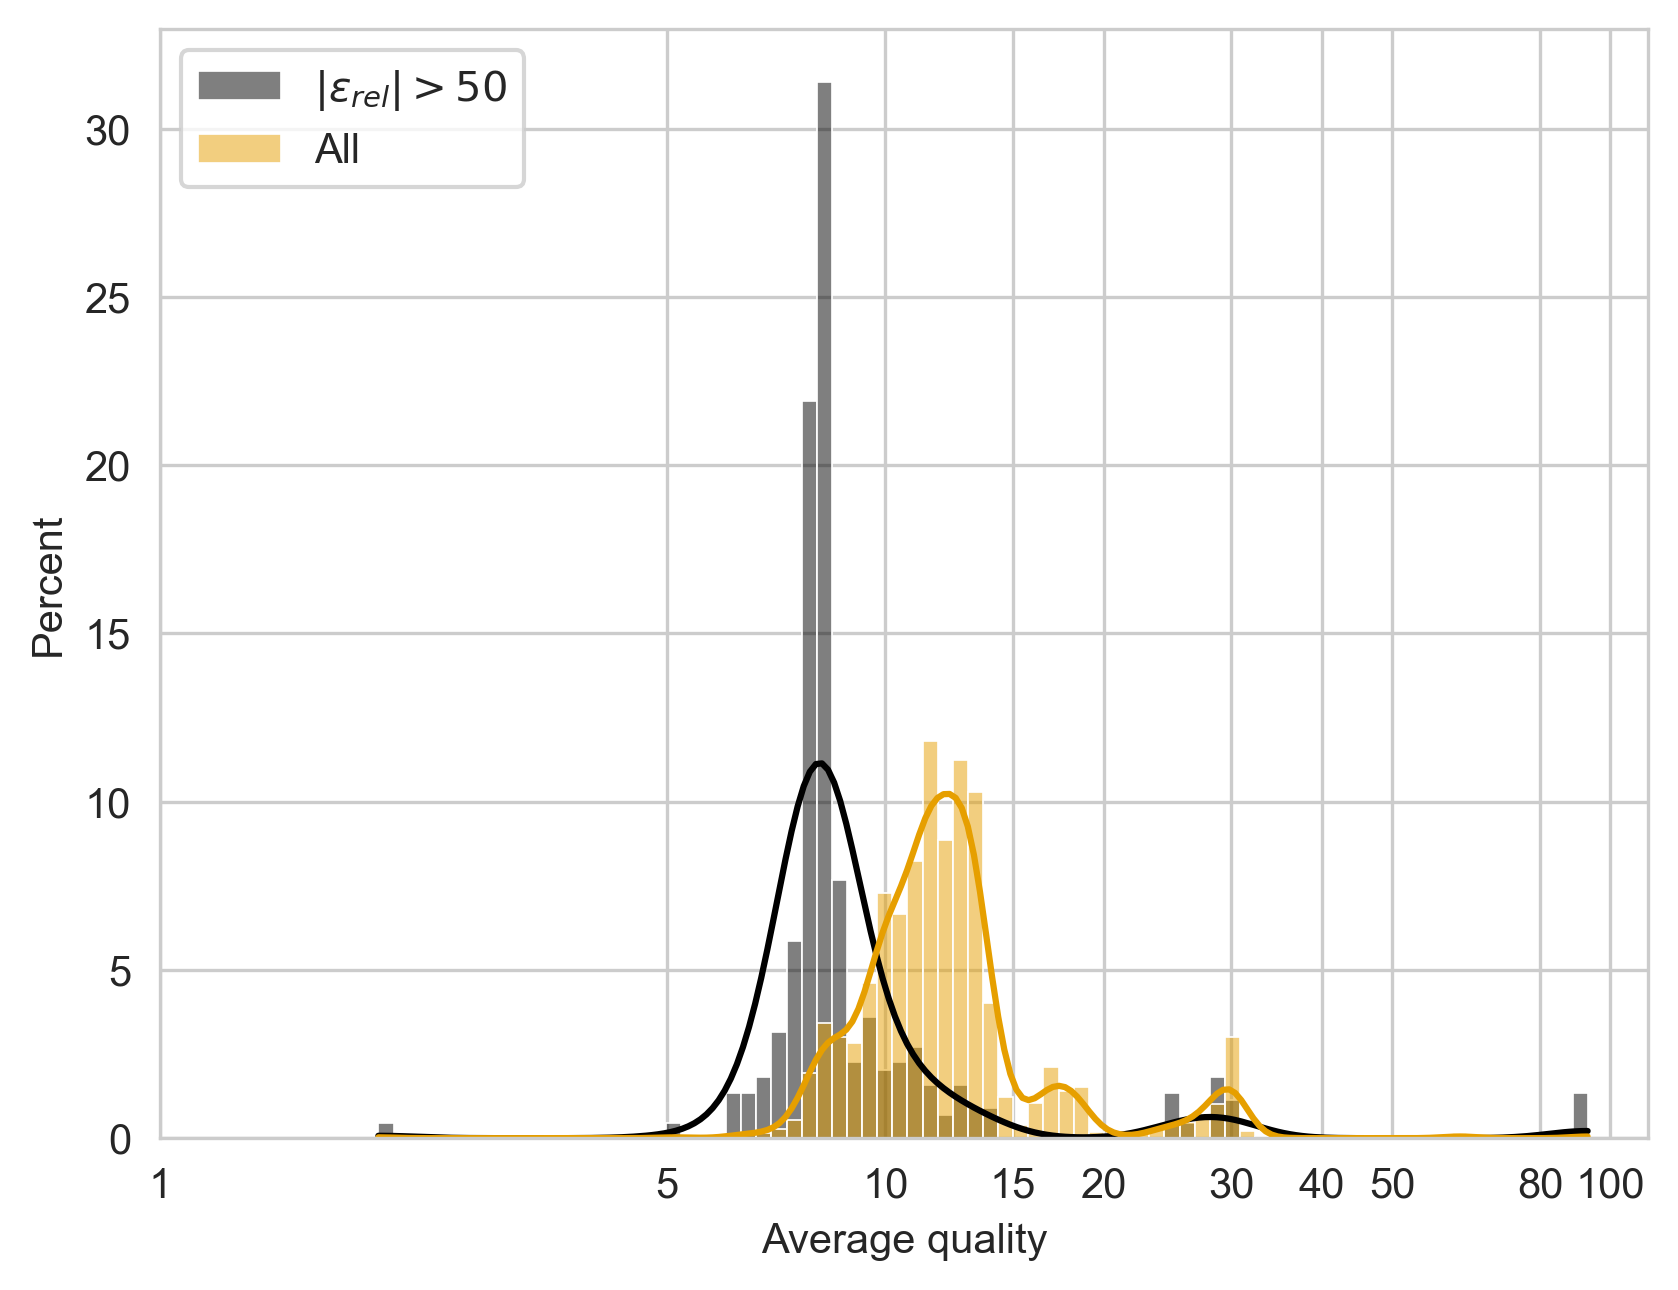

In [50]:
d = df.query("avg_qual > 0 and method in ['lrge-ava', 'lrge-2set'] and abs_relative_error > 50")["avg_qual"]
fig, ax = plt.subplots(dpi=300)
ax.set_xscale("log")
g = sns.histplot(d, bins=80, kde=True, ax=ax, label="worst", stat="percent")
sns.histplot(data=df.query("avg_qual > 0 and method in ['lrge-ava', 'lrge-2set']")["avg_qual"], bins=80, kde=True, ax=ax, label="all", stat="percent")
xticks = [1, 5, 10, 15, 20, 30, 40, 50, 80, 100]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_xlabel("Average quality")
ax.legend()
handles, labels = ax.get_legend_handles_labels()
labels = ["$|\epsilon_{rel}|>50$", "All"]
ax.legend(handles, labels, loc="upper left")
fig.savefig(FIGURES / "avg_qual_relative_error.png", bbox_inches="tight")

<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
/var/folders/bp/zbbdn_091x1_34h2k7b9nszm0000gn/T/ipykernel_24089/2940150002.py:12: SyntaxWarning: invalid escape sequence '\e'
  labels = ["$|\epsilon_{rel}|>50$", "All"]


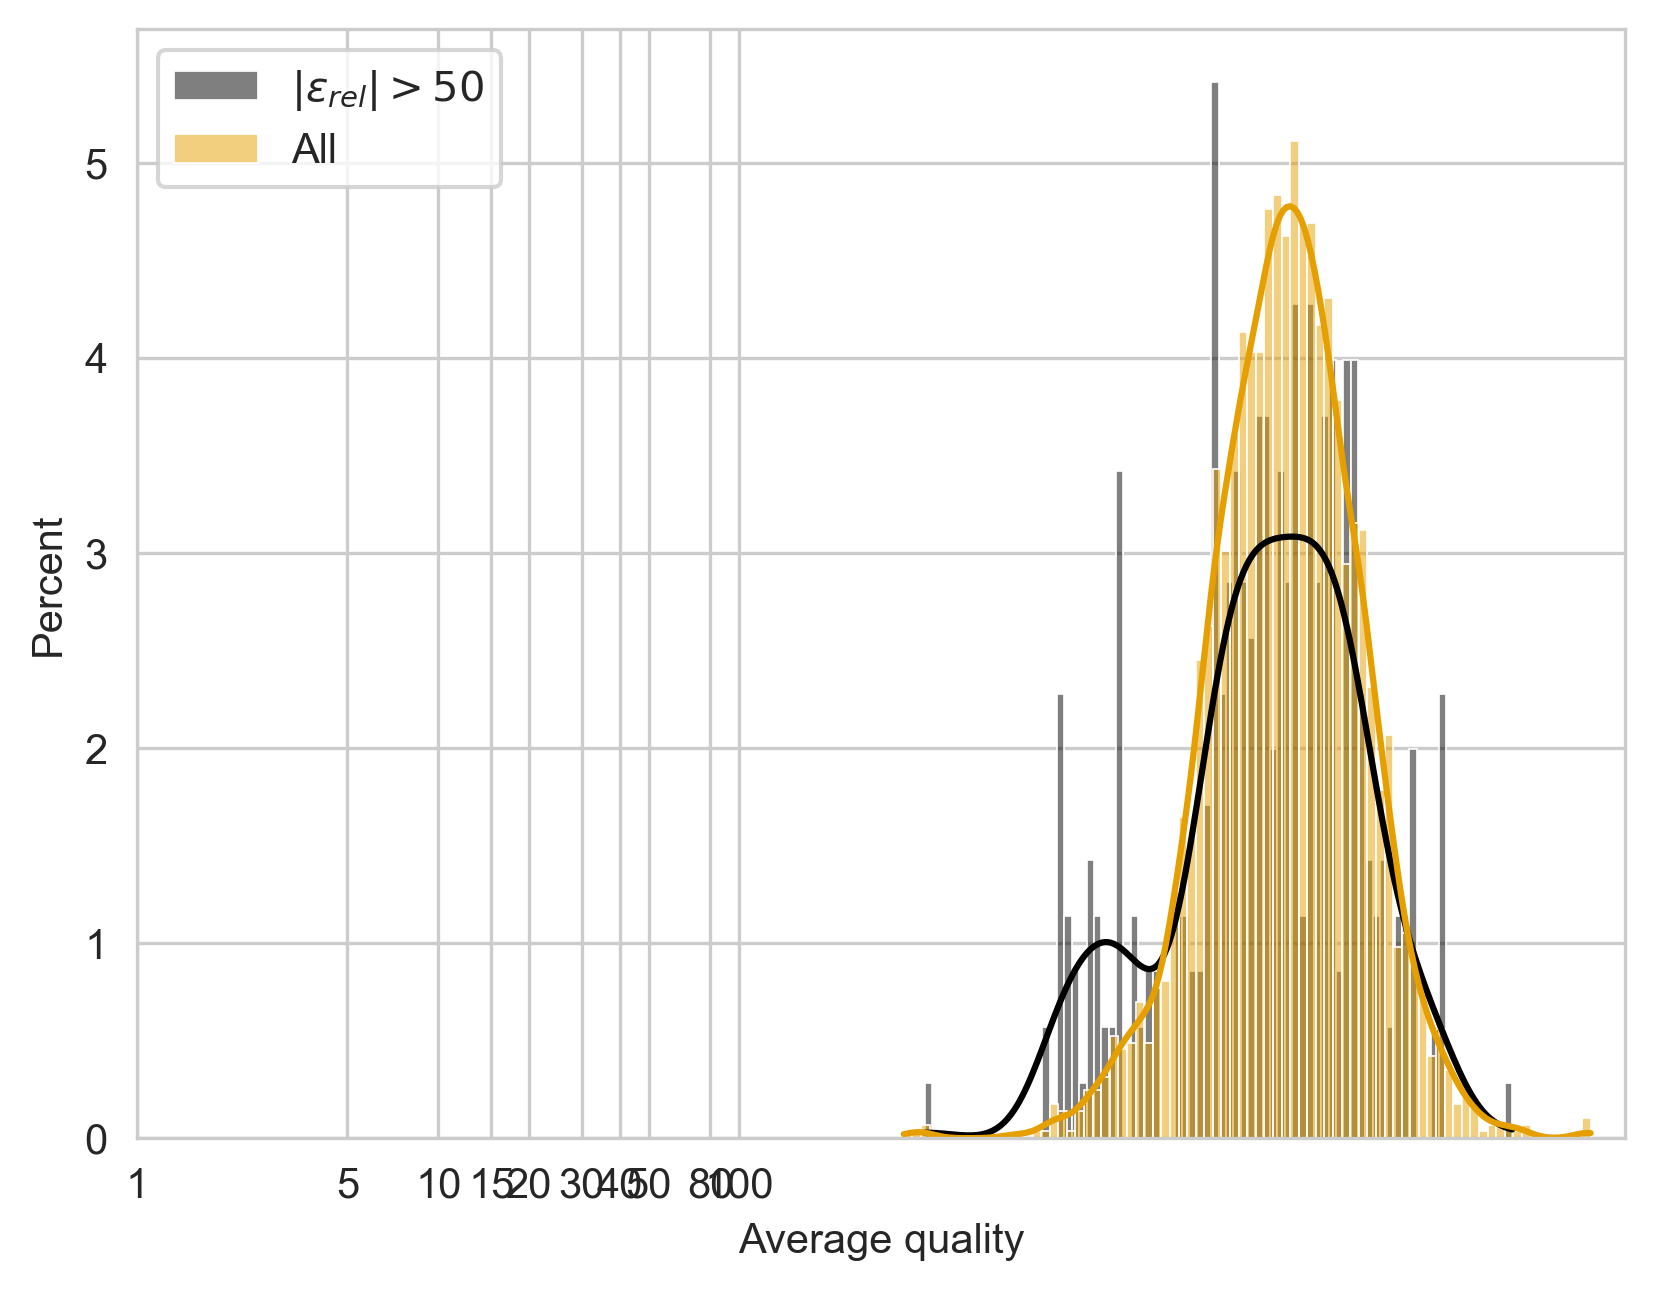

In [136]:
d = df.query("method in ['lrge-ava', 'lrge-2set'] and abs_relative_error > 50")["stats_avg_len"]
fig, ax = plt.subplots(dpi=300)
ax.set_xscale("log")
g = sns.histplot(d, bins=80, kde=True, ax=ax, label="worst", stat="percent")
sns.histplot(data=df.query("avg_qual > 0 and method in ['lrge-ava', 'lrge-2set']")["stats_avg_len"], bins=80, kde=True, ax=ax, label="all", stat="percent")
xticks = [1, 5, 10, 15, 20, 30, 40, 50, 80, 100]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_xlabel("Average quality")
ax.legend()
handles, labels = ax.get_legend_handles_labels()
labels = ["$|\epsilon_{rel}|>50$", "All"]
ax.legend(handles, labels, loc="upper left")
fig.savefig(FIGURES / "avg_qual_relative_error.png", bbox_inches="tight")

In [64]:
# worst = df.query("avg_qual > 0 and abs_relative_error > 50")
worst = df.query("avg_qual > 0 and avg_qual < 10")
worst.groupby(["method", "platform"])["abs_relative_error"].describe()

count        mean         std        min  \
method      platform                                                    
genomescope OXFORD_NANOPORE  350.0   30.646831   43.348365   0.000967   
            PACBIO_SMRT      239.0   46.284711   39.231182   0.189741   
lrge-2set   OXFORD_NANOPORE  350.0   19.409849   23.899075   0.058235   
            PACBIO_SMRT      239.0  108.266059  135.563458  11.775025   
lrge-ava    OXFORD_NANOPORE  350.0   21.834446   32.864836   0.077431   
            PACBIO_SMRT      239.0  115.200805  169.901963  13.689576   
mash        OXFORD_NANOPORE  350.0   56.664520   51.596108   0.017809   
            PACBIO_SMRT      239.0   39.889647   35.263059   0.008119   
raven       OXFORD_NANOPORE  350.0    3.416821    8.975527   0.017790   
            PACBIO_SMRT      239.0    3.963777    5.383904   0.000000   

                                   25%        50%         75%          max  
method      platform                                                        
genomescope OXFORD_NANOPORE   6.359759  12.665597   37.886819   510.958555  
            PACBIO_SMRT       7.381947  37.951148   98.141688    99.999989  
lrge-2set   OXFORD_NANOPORE   5.163813  12.240576   22.862894   151.469511  
            PACBIO_SMRT      41.494466  72.322295  116.026401  1376.664948  
lrge-ava    OXFORD_NANOPORE   5.521667  12.103196   24.049919   269.222049  
            PACBIO_SMRT      42.187428  72.076605  120.494850  1955.955316  
mash        OXFORD_NANOPORE  19.580832  47.528609   84.061787   464.343524  
            PACBIO_SMRT       9.216805  31.146939   62.020901   220.733806  
raven       OXFORD_NANOPORE   0.743918   1.669225    2.589926    87.429643  
            PACBIO_SMRT       1.861383   2.926036    4.812183    63.711609

[Text(0, 0, '0'),
 Text(0, 1, '1'),
 Text(0, 10, '10'),
 Text(0, 100, '100'),
 Text(0, 1000, '1000'),
 Text(0, 10000, '10000')]

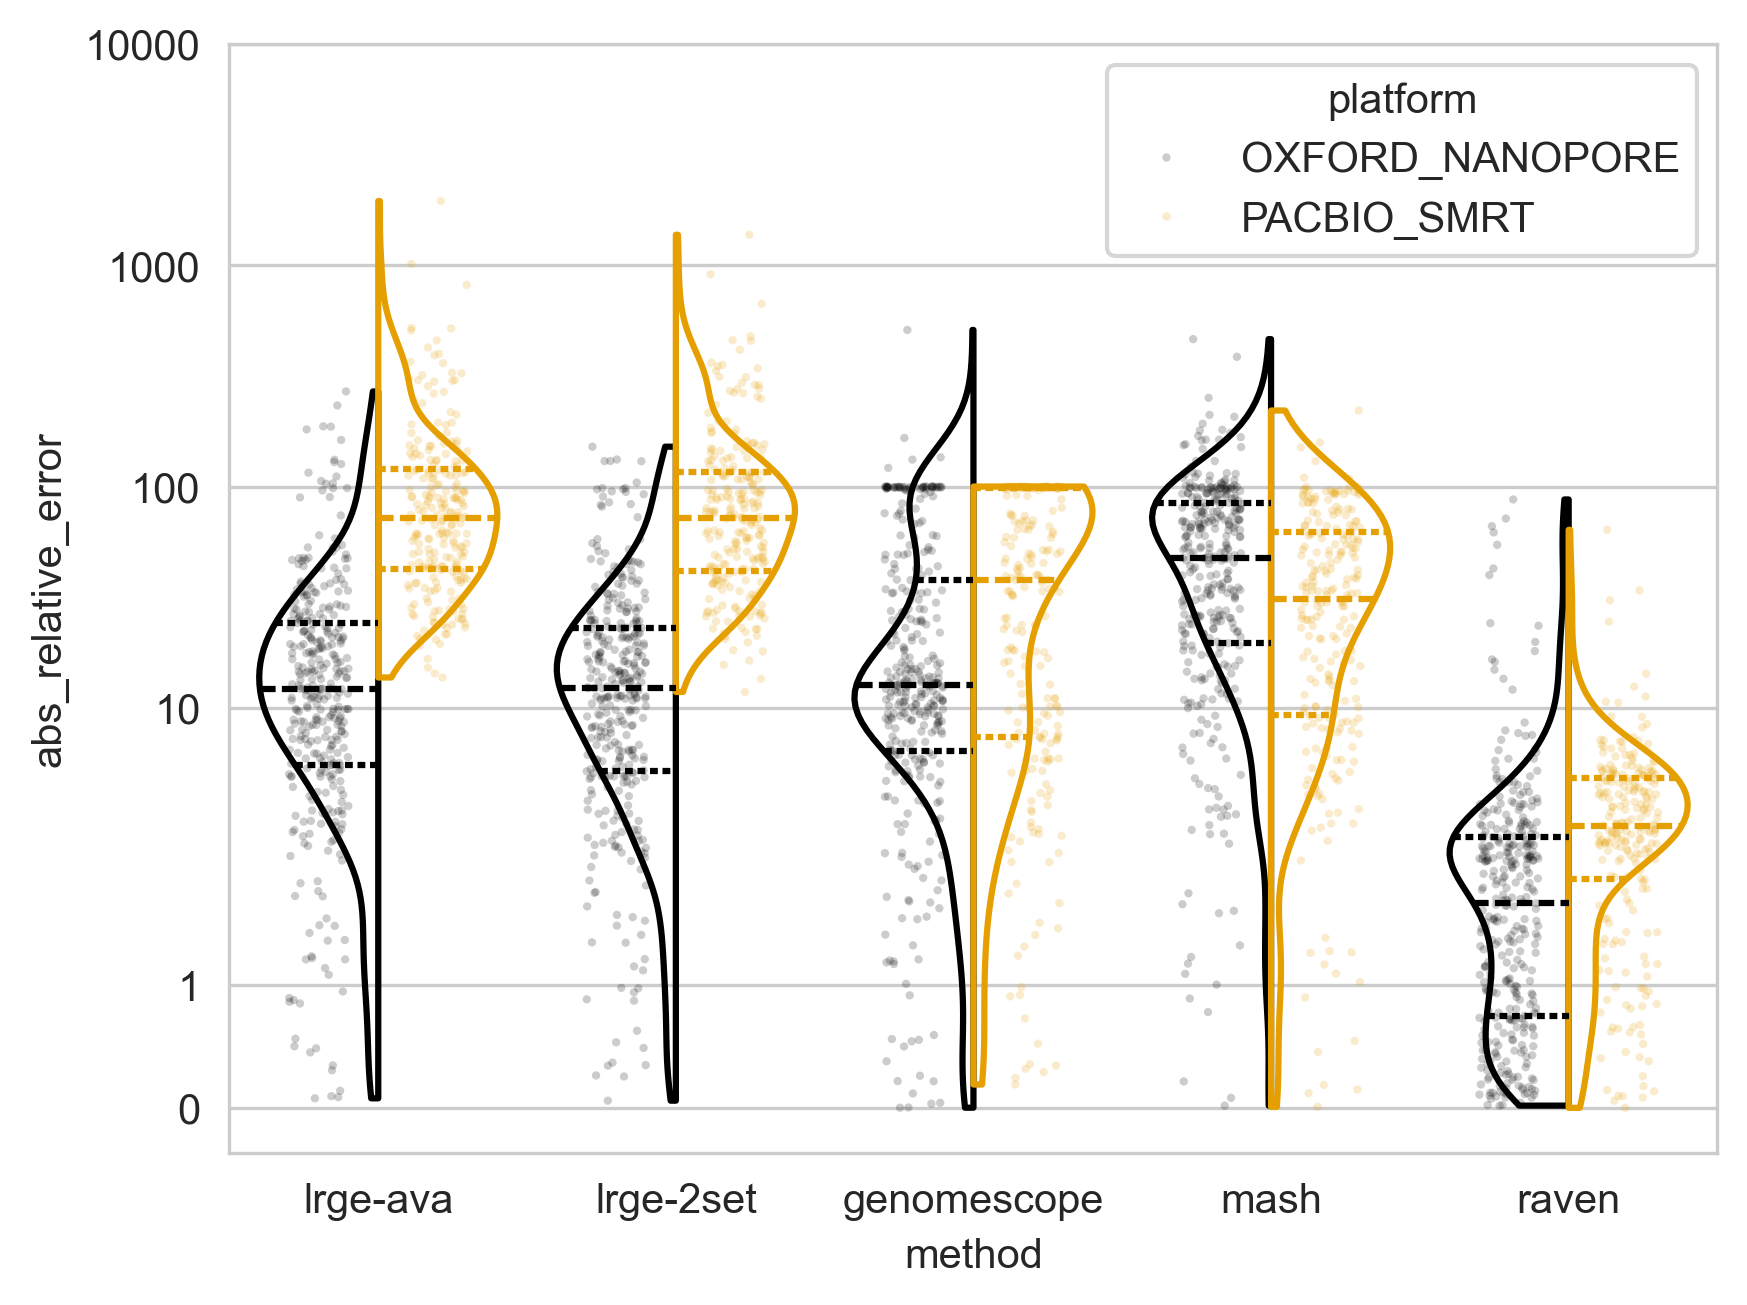

In [66]:
fig, ax = plt.subplots(dpi=300)
x = "method"
y = "abs_relative_error"
hue = "platform"
data = worst
ax.set_yscale("symlog", linthresh=1)
order = ["lrge-ava", "lrge-2set", "genomescope", "mash", "raven"]
hue_order = sorted(data[hue].unique())
ax.set_yscale("symlog")
sns.stripplot(
    x=x,
    y=y,
    hue=hue,
    data=data,
    ax=ax,
    dodge=True,
    alpha=0.2,
    jitter=0.2,
    order=order,
    hue_order=hue_order,
    size=2,
)

sns.violinplot(
    x=x,
    y=y,
    hue=hue,
    data=data,
    ax=ax,
    fill=False,
    linewidth=1.5,
    density_norm="width",
    legend=False,
    order=order,
    hue_order=hue_order,
    inner="quart",
    cut=0,
    split=True,
)


yticks = [0, 1, 10, 100, 1000, 10000]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

In [58]:
worst

count        mean          std        min  \
method      platform                                                     
genomescope OXFORD_NANOPORE  220.0  303.892409  2114.699746  50.028285   
            PACBIO_SMRT      105.0   93.905277    41.528949  50.828916   
lrge-2set   OXFORD_NANOPORE   48.0   85.610625    25.974565  50.595961   
            PACBIO_SMRT      171.0  142.107068   148.197495  50.209966   
lrge-ava    OXFORD_NANOPORE   53.0   96.200914    47.236180  50.769085   
            PACBIO_SMRT      171.0  151.714560   189.687119  50.278357   
mash        OXFORD_NANOPORE  742.0  103.809528    77.972914  50.031640   
            PACBIO_SMRT       91.0   85.549590    35.554767  50.029209   
raven       OXFORD_NANOPORE   29.0   82.672139    33.577670  51.051388   
            PACBIO_SMRT        2.0   70.775206     9.989435  63.711609   

                                   25%        50%         75%           max  
method      platform                                                         
genomescope OXFORD_NANOPORE  80.786998  99.039714   99.750351  30172.362713  
            PACBIO_SMRT      75.476546  98.855058   99.607209    434.663496  
lrge-2set   OXFORD_NANOPORE  59.727647  87.498438   98.373112    151.469511  
            PACBIO_SMRT      72.459766  94.636885  146.997048   1376.664948  
lrge-ava    OXFORD_NANOPORE  59.109701  89.641886  108.416240    269.222049  
            PACBIO_SMRT      72.057353  94.852379  151.738246   1955.955316  
mash        OXFORD_NANOPORE  65.327650  83.375321  108.666348    809.126097  
            PACBIO_SMRT      62.020901  79.370474   94.472194    220.733806  
raven       OXFORD_NANOPORE  62.012324  72.283762   87.429643    197.959118  
            PACBIO_SMRT      67.243408  70.775206   74.307005     77.838804